In [1]:
# from pycaret.datasets import get_data
import pandas as pd
from pycaret import classification
import numpy

from pycaret.classification import *

In [2]:
import pycaret
pycaret.__version__

In [1]:
#Import data
dataset = pd.read_csv(r'C:...', encoding='utf-8') Import data
dataset.head(5)

In [3]:
# Divide the training set and test set
data = dataset.sample(frac=0.8, random_state=8)  
data_unseen = dataset.drop(data.index) 
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

In [4]:
exp_clf101 = setup(data = data, target ='Y_ALL', session_id=1
                   , normalize=False,
                  feature_selection= False,
                   log_experiment = False, experiment_name = 'credit2')

In [6]:
data_unseen.to_csv(r'C::...', encoding='utf-8' )  # Export test data

In [7]:
data.to_csv(r'C::...', encoding='utf-8')  # Export training data

In [13]:
# Building Machine Learning Models
# support vector machine (rbfsvm), random forest (rf), logistic regression (lr), K-nearest neighbor (knn), and CatBoost classifier (CatBoost)
my_model = create_model(' ')  

In [9]:
evaluate_model(my_model) # initial model

In [6]:
final_model = finalize_model(my_model) # tuned_model my_model
unseen_predictions = predict_model(final_model, data=data_unseen)
unseen_predictions


In [7]:
tuned_model = tune_model(my_model)

In [10]:
evaluate_model(tuned_model)  # Model after optimal parameter search

In [11]:
final_model = finalize_model(tuned_model) 
unseen_predictions = predict_model(final_model, data=data_unseen)
unseen_predictions


In [12]:
interpret_model(tuned_model, use_train_data=True)

In [86]:
X_test = test_dataset.drop(columns = ['Y_ALL']) 
y_test = test_dataset['Y_ALL']

In [103]:
# Define a function to calculate performance metrics
def compute_accuracy_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

# Set the resampling times
n_iterations = 1000
accuracies = []
precisions = []
recalls = []
f1_scores = []
auc_scores = []

# Resampling is used to calculate indicators
for _ in range(n_iterations):
    # Bootstrap Resampling test set
    X_resampled, y_resampled = resample(X_test, y_test)
     # Use a trained model to make predictions
    y_pred_resampled = tuned_model.predict(X_resampled)  # Use a trained model to make predictions
    y_pred_proba = tuned_model.predict_proba(X_resampled)[:, 1]  # Used to calculate the probability value of the AUC
    
     # Calculate each index
    precisions.append(precision_score(y_resampled, y_pred_resampled))
    recalls.append(recall_score(y_resampled, y_pred_resampled))
    f1_scores.append(f1_score(y_resampled, y_pred_resampled))
    auc_scores.append(roc_auc_score(y_resampled, y_pred_proba))
    accuracy_resampled = compute_accuracy_score(y_resampled, y_pred_resampled)
    accuracies.append(accuracy_resampled)

# Calculated standard deviation
std_accuracy = np.std(accuracies)

# Calculate the standard deviation of each indicator
std_precision = np.std(precisions)
std_recall = np.std(recalls)
std_f1 = np.std(f1_scores)
std_auc = np.std(auc_scores)

print(f"Standard Deviation of Accuracy: {std_accuracy}")
print(f"Standard Deviation of Precision: {std_precision}")
print(f"Standard Deviation of Recall: {std_recall}")
print(f"Standard Deviation of F1-Score: {std_f1}")
print(f"Standard Deviation of AUC: {std_auc}")

Standard Deviation of Accuracy: 0.07542386907536955
Standard Deviation of Precision: 0.1510365242271786
Standard Deviation of Recall: 0.17681362104252202
Standard Deviation of F1-Score: 0.142961572869455
Standard Deviation of AUC: 0.1292609839805512


# SHAP

In [19]:
import pandas as pd
import numpy as np
import xgboost
import shap
import catboost
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score


In [20]:
explainer = shap.TreeExplainer(tuned_model) # recreated_catboost_model  model

shap.initjs()

In [21]:
train_df = pd.read_csv(r'C:\..\.csv', encoding='utf-8')  # Replace with training set CSV file path
test_df = pd.read_csv(r'C:\..\.csv', encoding='utf-8')    # Replace with test set CSV file path



# Extract features and labels
X_train = train_df.drop(columns='Y_ALL') 
y_train = train_df['Y_ALL']                
X_test = test_df.drop(columns='Y_ALL')    
y_test = test_df['Y_ALL'] 

In [22]:
# Loading full data set
data = pd.read_csv(r'C:\..\.csv') 
data_x = data.drop(columns = ['Y_ALL'])
data_y = data['Y_ALL']

In [23]:
data_display = pd.read_csv(r'C:\..\.csv') # Loading the feature interpretation document
data_x_display = data_display.drop(columns = ['Y_ALL']) 
data_y_display = data_display['Y_ALL']

In [24]:
shap_values = explainer.shap_values(data_x)  
shap_values2 = explainer(data_x)  

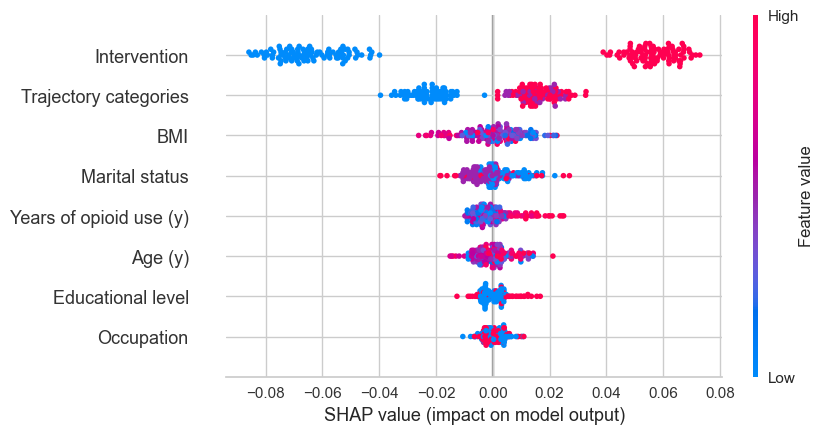

In [38]:
shap.plots.beeswarm(shap_values2)

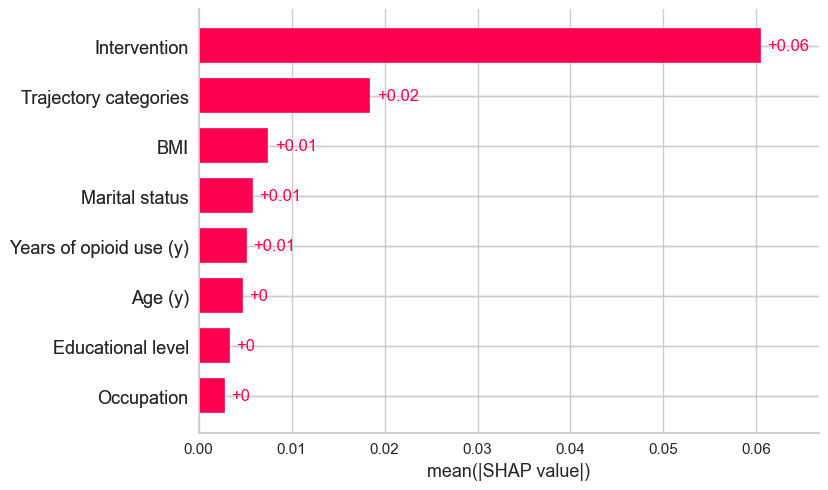

In [26]:
shap.plots.bar(shap_values2)

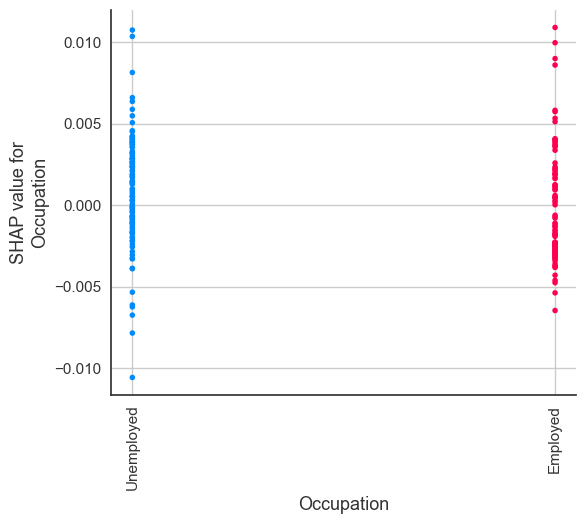

In [41]:
# Dependence Plot  Intervention	Age (y)	Sex	BMI	Occupation	Marital status	Educational level
# Years of opioid use (y)	MMT time (y)	Trajectory class Occupation    Trajectory categories
shap.dependence_plot('Occupation', shap_values, data_x, 
                     display_features=data_x_display,
                     interaction_index='Occupation')